In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

2024-08-18 09:25:37.707063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 MB 14.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 22.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 15.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 18.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 9.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.3 MB/s eta

In [5]:
dataset_dir = '/Users/vanshikanijhawan/Desktop/NNDL/Rice_Image_Dataset'

# Set parameters
img_height, img_width = 64, 64  # Image dimensions
batch_size = 32  # Batch size


In [6]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to [0, 1]
    rotation_range=20,       # Randomly rotate images
    width_shift_range=0.2,   # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest',     # Fill mode for points outside the input boundaries
    validation_split=0.2     # Reserve 20% of images for validation
)

In [7]:
# Training data generator
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

Found 60000 images belonging to 5 classes.


In [8]:
# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 15000 images belonging to 5 classes.


In [9]:
#CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

2024-08-18 09:26:03.511241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=5  # Adjust epochs as needed
)

model.save('/Users/vanshikanijhawan/Desktop/NNDL/Rice_CNN_model.h5')

Epoch 1/5
1875/1875 [==============================] - 278s 148ms/step - loss: 0.1505 - accuracy: 0.9449 - val_loss: 0.1515 - val_accuracy: 0.9427
Epoch 2/5
1875/1875 [==============================] - 269s 144ms/step - loss: 0.0942 - accuracy: 0.9671 - val_loss: 0.0810 - val_accuracy: 0.9728
Epoch 3/5
1875/1875 [==============================] - 281s 150ms/step - loss: 0.0750 - accuracy: 0.9745 - val_loss: 0.0387 - val_accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 270s 144ms/step - loss: 0.0635 - accuracy: 0.9780 - val_loss: 0.0305 - val_accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 272s 145ms/step - loss: 0.0572 - accuracy: 0.9810 - val_loss: 0.0201 - val_accuracy: 0.9934


In [13]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


469/469 [==============================] - 42s 89ms/step - loss: 0.0185 - accuracy: 0.9928
Validation Loss: 0.0185
Validation Accuracy: 0.9928


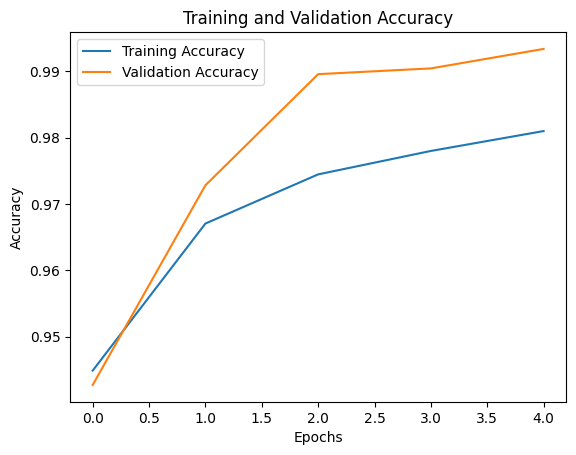

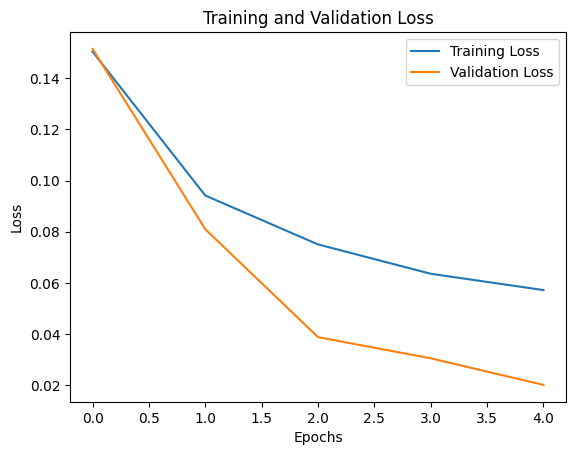

In [14]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#with transfer learning

In [24]:
from tensorflow.keras.applications import MobileNet

# Load the MobileNet model with local weights
base_model = MobileNet(weights='/Users/vanshikanijhawan/Desktop/NNDL/Rice_Image_Dataset/mobilenet_1_0_224_tf_no_top.h5', 
                       include_top=False, 
                       input_shape=(64, 64, 3))



In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Define the path to the downloaded MobileNet weights
weights_path = '/Users/vanshikanijhawan/Desktop/NNDL/Rice_Image_Dataset/mobilenet_1_0_224_tf_no_top.h5'

# Load the MobileNet model, excluding the top layers
base_model = MobileNet(weights=weights_path, include_top=False, input_shape=(64, 64, 3))



In [27]:
# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

In [29]:
# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)


In [30]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    directory='/Users/vanshikanijhawan/Desktop/NNDL/Rice_Image_Dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 60000 images belonging to 5 classes.


In [31]:
validation_generator = train_datagen.flow_from_directory(
    directory='/Users/vanshikanijhawan/Desktop/NNDL/Rice_Image_Dataset',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 15000 images belonging to 5 classes.


In [32]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=5
)

model.save('/Users/vanshikanijhawan/Desktop/NNDL/Rice_MobileNet_model.h5')



Epoch 1/5
1875/1875 [==============================] - 181s 95ms/step - loss: 0.0709 - accuracy: 0.9773 - val_loss: 0.0344 - val_accuracy: 0.9886
Epoch 2/5
1875/1875 [==============================] - 214s 114ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0271 - val_accuracy: 0.9910
Epoch 3/5
1875/1875 [==============================] - 175s 93ms/step - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.0400 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0253 - val_accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 175s 93ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0257 - val_accuracy: 0.9919


In [33]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")



469/469 [==============================] - 38s 80ms/step - loss: 0.0257 - accuracy: 0.9919
Validation Loss: 0.0257
Validation Accuracy: 0.9919


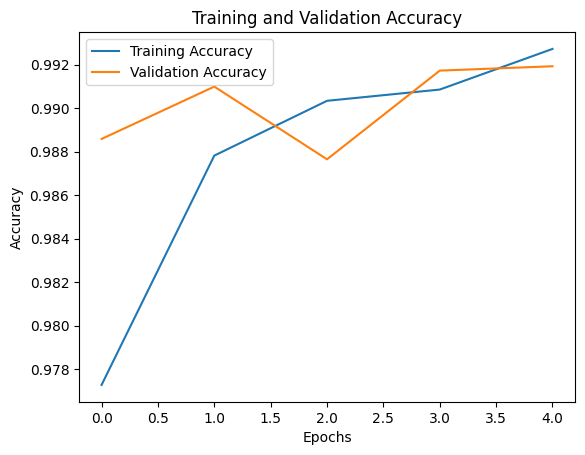

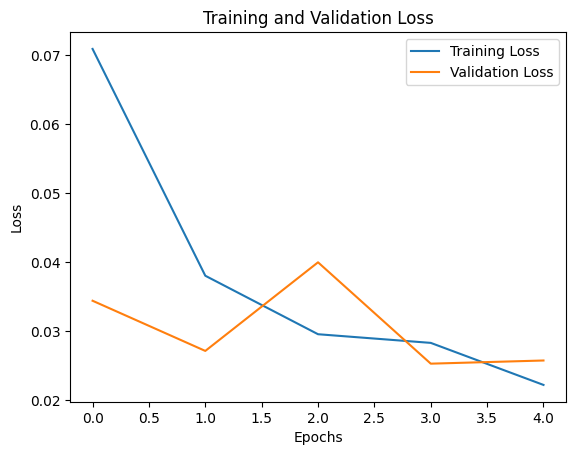

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

#confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)



469/469 [==============================] - 34s 72ms/step
Confusion Matrix:
[[588 599 594 593 626]
 [588 609 616 596 591]
 [592 596 606 612 594]
 [631 624 572 593 580]
 [597 569 618 609 607]]


In [ ]:
class_labels = list(train_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))